In [7]:
import json
import pprint
# import ast
import datetime
from tabulate import tabulate as tbl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


val = []
ts = []

with open('schema.json') as f:
    log_schema= json.load(f)

with open('car-20200505152923.log') as d_log:
    dlog = d_log.read().replace('false','False').replace('true','True').splitlines()

    for p in range(len(dlog)-1):
        lp = dlog[p]
        val.append(eval(lp))
        ts.append(val[p]['timestamp'])
        
data = dict(zip(ts,val))

print('Drive started at {start} and ended at {end}.\nLogged Duration: {log_dur}'.format(start=ts[0],end=ts[-1],log_dur=datetime.datetime.strptime(ts[-1], '%Y-%m-%d %H:%M:%S.%f')-datetime.datetime.strptime(ts[0], '%Y-%m-%d %H:%M:%S.%f')))

Drive started at 2020-05-06 07:28:38.885000 and ended at 2020-05-06 08:17:42.446000.
Logged Duration: 0:49:03.561000


In [4]:
para = list(log_schema.keys())
data_stats = [['Parameter', 'N Points']]

for p in range(len(para)-1):
    par_list = para[p].replace('.','_')
    exec( par_list +'= {}')
    pts = par_list +'_ts'
    exec(pts + '= {}')
    for t in range(len(ts)-1):
        if para[p] in data[ts[t]]:
            pts = ts[t]
            exec('{par_list}[\'{timestamp}\']=data[\'{timestamp}\'][\'{para}\']'.format(par_list = par_list,para = para[p],timestamp=ts[t]))
        else:
            continue
    exec('n_points = len({par_list})'.format(par_list = par_list))
    data_stats.append([para[p],n_points])
    exec('{par_list}_df = pd.DataFrame({par_list},index=[0])'.format(par_list=par_list))

print(tbl(data_stats))

------------------------------------------------------  --------
Parameter                                               N Points
doorState.fondDoorLeftState                             0
lightState_front.fogLight                               1997
consumptionLongTermGeneral.speedValueState              276
startStopState                                          0
consumptionShortTermGeneral.distanceValue               366
Radio_Tuner.ServiceComponentId                          0
System_UnitDistance                                     1
Media_PlayerState.Type                                  3019
Radio_Tuner.sendsMatureContent                          0
hevacFanLevelRear.automatic_left                        0
tyreRequiredPressures.pressureSpareWheel                0
temperatureRearRight                                    0
vehicleSpeed                                            28568
fuelWarningSecondaryTank                                1
Nav_CurrentPosition.City                    

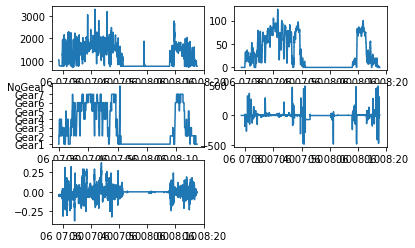

In [94]:
x = list(engineSpeed.keys())
y = list(vehicleSpeed.keys())
z = list(currentGear.keys())
a = list(wheelAngle.keys())
b = list(lateralAcceleration.keys())

for i in range(len(x)):
     x[i] = datetime.datetime.strptime(x[i], '%Y-%m-%d %H:%M:%S.%f')
for i in range(len(y)):     
    y[i] = datetime.datetime.strptime(y[i], '%Y-%m-%d %H:%M:%S.%f')
for i in range(len(z)): 
    z[i] = datetime.datetime.strptime(z[i], '%Y-%m-%d %H:%M:%S.%f')
for i in range(len(a)):
    a[i] = datetime.datetime.strptime(a[i], '%Y-%m-%d %H:%M:%S.%f')
for i in range(len(b)): 
    b[i] = datetime.datetime.strptime(b[i], '%Y-%m-%d %H:%M:%S.%f')


# plt.plot(x,list(engineSpeed.values()),y,list(vehicleSpeed.values()))

# fig, ax1 = plt.subplots()

# color = 'tab:red'
# ax1.set_xlabel('time (s)')
# ax1.set_ylabel('RPM', color=color)
# ax1.plot(x, list( engineSpeed.values()), color=color)
# ax1.tick_params(axis='y', labelcolor=color)

# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# color = 'tab:blue'
# ax2.set_ylabel('km/h', color=color)  # we already handled the x-label with ax1
# ax2.plot(y, list(vehicleSpeed.values()), color=color)
# ax2.tick_params(axis='y', labelcolor=color)

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.show()

# fig, ax1 = plt.subplots()

# color = 'tab:red'
# ax1.set_xlabel('time (s)')
# ax1.set_ylabel('RPM', color=color)
# ax1.plot(x, list( engineSpeed.values()), color=color)
# ax1.tick_params(axis='y', labelcolor=color)

# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# color = 'tab:blue'
# ax2.set_ylabel('km/h', color=color)  # we already handled the x-label with ax1
# ax2.plot(y, list(vehicleSpeed.values()), color=color)
# ax2.tick_params(axis='y', labelcolor=color)

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.show()

plt.subplot(321)
plt.plot(x, list(engineSpeed.values()))

plt.subplot(322)
plt.plot(y, list(vehicleSpeed.values()))

plt.subplot(323)
plt.plot(z, list(currentGear.values()))

plt.subplot(324)
plt.plot(a, list(wheelAngle.values()))

plt.subplot(325)
plt.plot(b, list(lateralAcceleration.values()))

plt.show()